# Clustering

1. **Objective**:
   - Group the documents (articles) using clustering algorithms and evaluate the results.
   
2. **Input**:
   - Four document matrices per vectorization technique (Doc2Vec, BERT, Sentence-BERT), each with dimensions (100, 600).

3. **Tasks**:
   - Combine the four matrices into a single matrix for each technique.
   - Apply clustering using:
     - **K-Means** (with `k=4` for 4 journals).
     - **DBSCAN** (select `eps` and `min_samples` heuristically).
     - **Gaussian Mixture Model**.
   - Evaluate the clusters using:
     - Metrics: Precision, Recall, F1-Score, Accuracy.
     - Visualization: Use UMAP, t-SNE, or other tools (e.g., Seaborn).

We will run this clustering for one matrix (of Doc2Vec) and then apply the same to the other two matrices.

In [1]:
# open the matrix
import os

word2vec_dir = os.path.join('..', 'data', 'word2vec')

aj_file_path = os.path.join(word2vec_dir, 'aj_w_word_2_vec.csv')
bbc_file_path = os.path.join(word2vec_dir, 'bbc_w_word_2_vec.csv')
jp_file_path = os.path.join(word2vec_dir, 'jp_w_word_2_vec.csv')
nyt_file_path = os.path.join(word2vec_dir, 'nyt_w_word_2_vec.csv')

import pandas as pd

files_path = {'aj': aj_file_path, 'bbc': bbc_file_path, 'jp': jp_file_path, 'nyt': nyt_file_path}

dfs = {}

for key, file_path in files_path.items():
    df = pd.read_csv(file_path)
    dfs[key] = df

In [2]:
df = dfs['aj']
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.022521,0.137185,-0.002211,-0.039643,-0.031005,-0.347620,0.002779,0.365647,-0.121597,-0.109704,...,0.199788,0.074200,-0.088092,0.022284,0.298564,0.102493,0.134546,-0.144299,0.100480,-0.047627
1,0.041000,0.097880,0.009945,-0.023049,-0.014066,-0.281668,0.017728,0.273555,-0.078797,-0.100252,...,0.152890,0.067715,-0.050703,0.037746,0.218773,0.091241,0.075117,-0.109152,0.077757,-0.043145
2,0.015928,0.078394,0.002245,-0.035897,0.006362,-0.166247,-0.006521,0.203604,-0.064552,-0.059874,...,0.105410,0.048606,-0.038949,0.021782,0.162012,0.043097,0.088589,-0.080152,0.047809,-0.026192
3,0.007726,0.112028,0.005318,-0.016846,-0.033734,-0.275380,-0.003895,0.280921,-0.075496,-0.074886,...,0.169521,0.047533,-0.086396,0.029938,0.228844,0.086849,0.103227,-0.107710,0.078229,-0.033896
4,0.004884,0.069499,-0.010344,-0.012207,-0.034800,-0.182546,-0.002230,0.187553,-0.054743,-0.034933,...,0.110635,0.016858,-0.055687,0.007479,0.131575,0.057780,0.064911,-0.060543,0.045243,-0.030711


In [3]:
# the shape of the matrix
df.shape

(599, 100)

In [4]:
# import and install needed tools from sklearn
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns



## Step 1 - Combine the matrices

In [7]:
# Combine the matrices
df_aj = dfs['aj'].reset_index(drop=True)
df_bbc = dfs['bbc'].reset_index(drop=True)
df_jp = dfs['jp'].reset_index(drop=True)
df_nyt = dfs['nyt'].reset_index(drop=True)

# add a cluster column to each df
df_aj['cluster'] = 0
df_bbc['cluster'] = 1
df_jp['cluster'] = 2
df_nyt['cluster'] = 3

# add to the df a 'cluster' column that will be the actual cluster 0 for aj etc

df = pd.concat([df_aj, df_bbc, df_jp, df_nyt]).reset_index(drop=True)

# check the shape

df.shape

(2346, 101)

In [9]:
df['cluster'].head()

0    0
1    0
2    0
3    0
4    0
Name: cluster, dtype: int64

## Step 2 - K-Means Clustering

In [10]:
# apply k-means with k=4

kmeans = KMeans(n_clusters=4, random_state=0).fit(df)

df['cluster_kmeans'] = kmeans.labels_

df['cluster_kmeans'].head()

0    1
1    1
2    1
3    1
4    1
Name: cluster_kmeans, dtype: int32

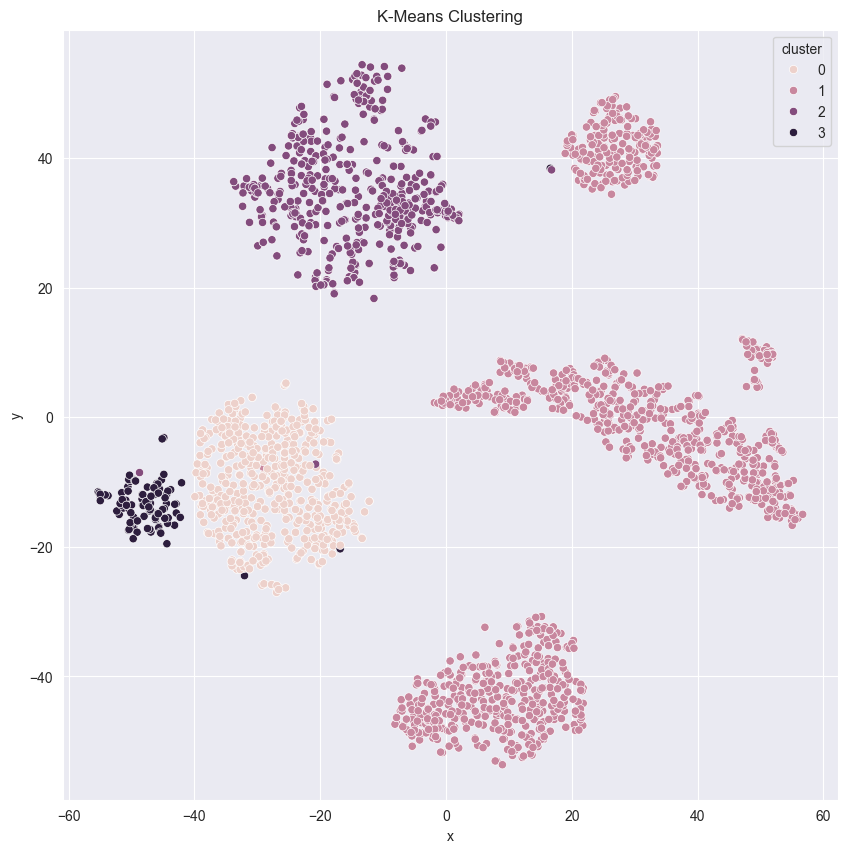

In [11]:
# use t-SNE to visualize the clusters

tsne = TSNE(n_components=2, random_state=0)

tsne_df = tsne.fit_transform(df)

tsne_df = pd.DataFrame(tsne_df, columns=['x', 'y'])

tsne_df['cluster'] = df['cluster_kmeans']

plt.figure(figsize=(10, 10))
# add labels
plt.title('K-Means Clustering')
sns.scatterplot(x='x', y='y', hue='cluster', data=tsne_df)

plt.show()


As we can see from the plot above the clustering did work and we have distinct (almost) clusters.

# Step 3 - DBSCAN Clustering

In [12]:
# apply DBSCAN
# we want to have 4 clusters

dbscan = DBSCAN(eps=0.5, min_samples=5).fit(df)

df['cluster_dbscan'] = dbscan.labels_

df['cluster_dbscan'].head()

0    0
1    0
2    0
3    0
4    0
Name: cluster_dbscan, dtype: int64

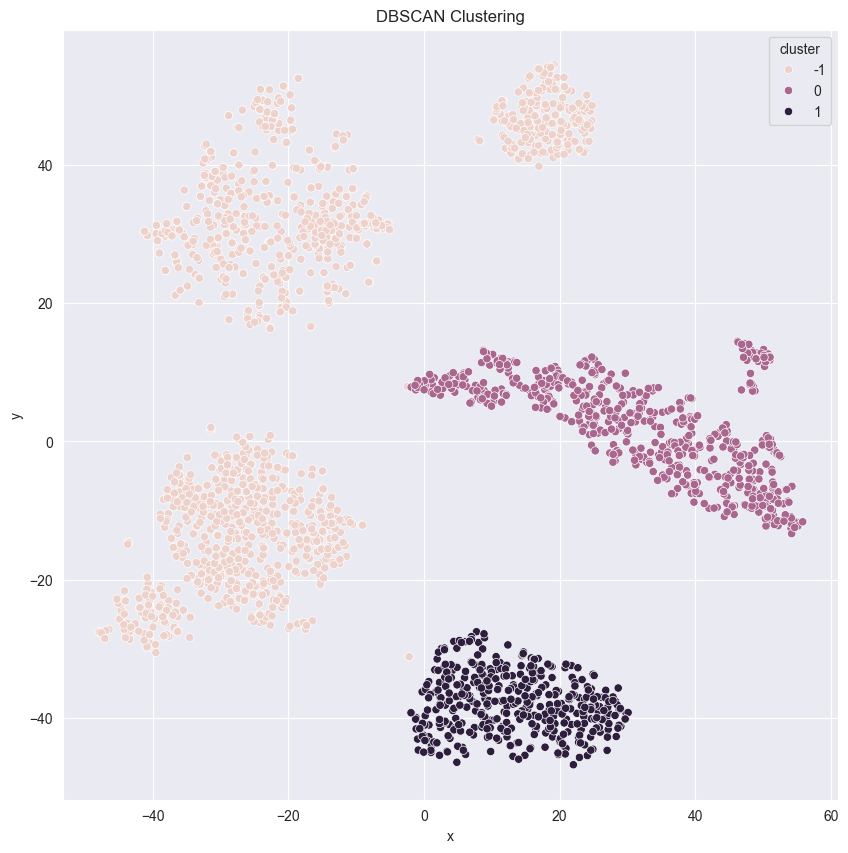

In [13]:
# use t-SNE to visualize the clusters

tsne = TSNE(n_components=2, random_state=0)

tsne_df = tsne.fit_transform(df)

tsne_df = pd.DataFrame(tsne_df, columns=['x', 'y'])

tsne_df['cluster'] = df['cluster_dbscan']

plt.figure(figsize=(10, 10))

plt.title('DBSCAN Clustering')

sns.scatterplot(x='x', y='y', hue='cluster', data=tsne_df)

plt.show()

# Step 4 - Gaussian Mixture Model Clustering

In [14]:
# apply GMM

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=0).fit(df)

df['cluster_gmm'] = gmm.predict(df)

df['cluster_gmm'].head()


0    3
1    3
2    3
3    3
4    3
Name: cluster_gmm, dtype: int64

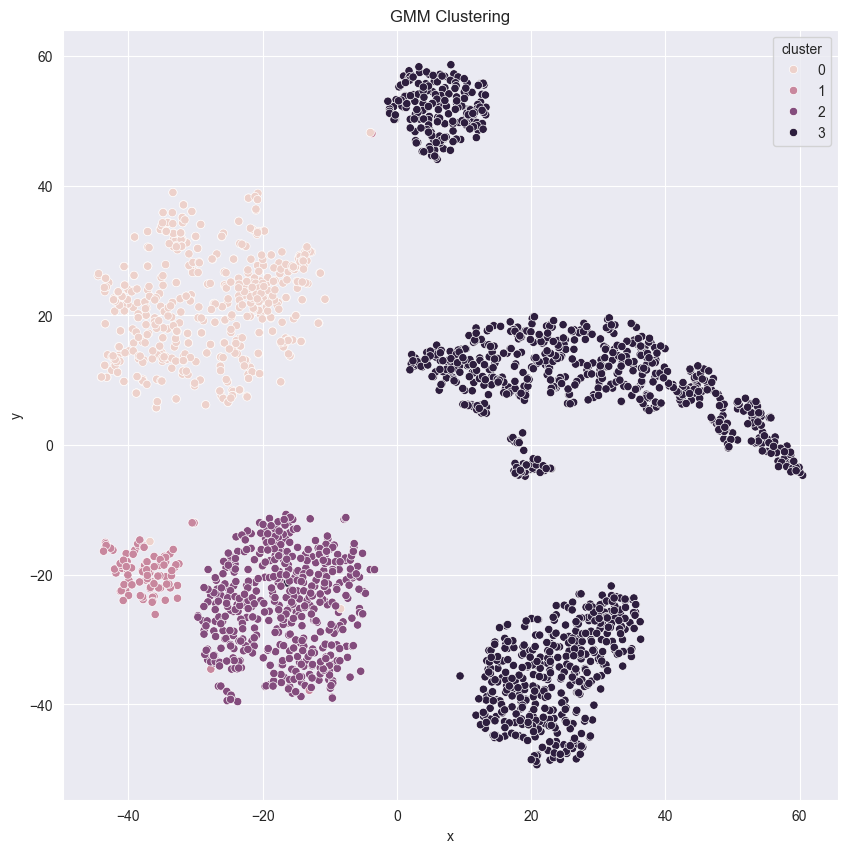

In [15]:
# plot

tsne = TSNE(n_components=2, random_state=0)

tsne_df = tsne.fit_transform(df)

tsne_df = pd.DataFrame(tsne_df, columns=['x', 'y'])

tsne_df['cluster'] = df['cluster_gmm']

plt.figure(figsize=(10, 10))

plt.title('GMM Clustering')

sns.scatterplot(x='x', y='y', hue='cluster', data=tsne_df)

plt.show()

# Step 5 - Evaluation Metrics

we will be using

- Precision
- Recall
- F1-Score
- Accuracy

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# K-Means
precision_kmeans = precision_score(df['cluster'], df['cluster_kmeans'], average='weighted', zero_division=0)
recall_kmeans = recall_score(df['cluster'], df['cluster_kmeans'], average='weighted', zero_division=0)
f1_kmeans = f1_score(df['cluster'], df['cluster_kmeans'], average='weighted')
accuracy_kmeans = accuracy_score(df['cluster'], df['cluster_kmeans'])

# DBSCAN
precision_dbscan = precision_score(df['cluster'], df['cluster_dbscan'], average='weighted', zero_division=0)
recall_dbscan = recall_score(df['cluster'], df['cluster_dbscan'], average='weighted', zero_division=0)
f1_dbscan = f1_score(df['cluster'], df['cluster_dbscan'], average='weighted')
accuracy_dbscan = accuracy_score(df['cluster'], df['cluster_dbscan'])

# GMM
precision_gmm = precision_score(df['cluster'], df['cluster_gmm'], average='weighted', zero_division=0)
recall_gmm = recall_score(df['cluster'], df['cluster_gmm'], average='weighted', zero_division=0)
f1_gmm = f1_score(df['cluster'], df['cluster_gmm'], average='weighted')
accuracy_gmm = accuracy_score(df['cluster'], df['cluster_gmm'])


In [18]:
# print the results

print('K-Means')
print(f'Precision: {precision_kmeans}')
print(f'Recall: {recall_kmeans}')
print(f'F1-Score: {f1_kmeans}')
print(f'Accuracy: {accuracy_kmeans}')

print('\nDBSCAN')
print(f'Precision: {precision_dbscan}')
print(f'Recall: {recall_dbscan}')
print(f'F1-Score: {f1_dbscan}')
print(f'Accuracy: {accuracy_dbscan}')


print('\nGMM')
print(f'Precision: {precision_gmm}')
print(f'Recall: {recall_gmm}')
print(f'F1-Score: {f1_gmm}')
print(f'Accuracy: {accuracy_gmm}')

K-Means
Precision: 0.0038377228026789
Recall: 0.0017050298380221654
F1-Score: 0.002055077169981059
Accuracy: 0.0017050298380221654

DBSCAN
Precision: 0.2553282182438193
Recall: 0.2549019607843137
F1-Score: 0.2551149114616607
Accuracy: 0.2549019607843137

GMM
Precision: 0.38235294117647056
Recall: 0.4629156010230179
F1-Score: 0.3991382475455947
Accuracy: 0.4629156010230179


For compression will plot the real clusters with real labels

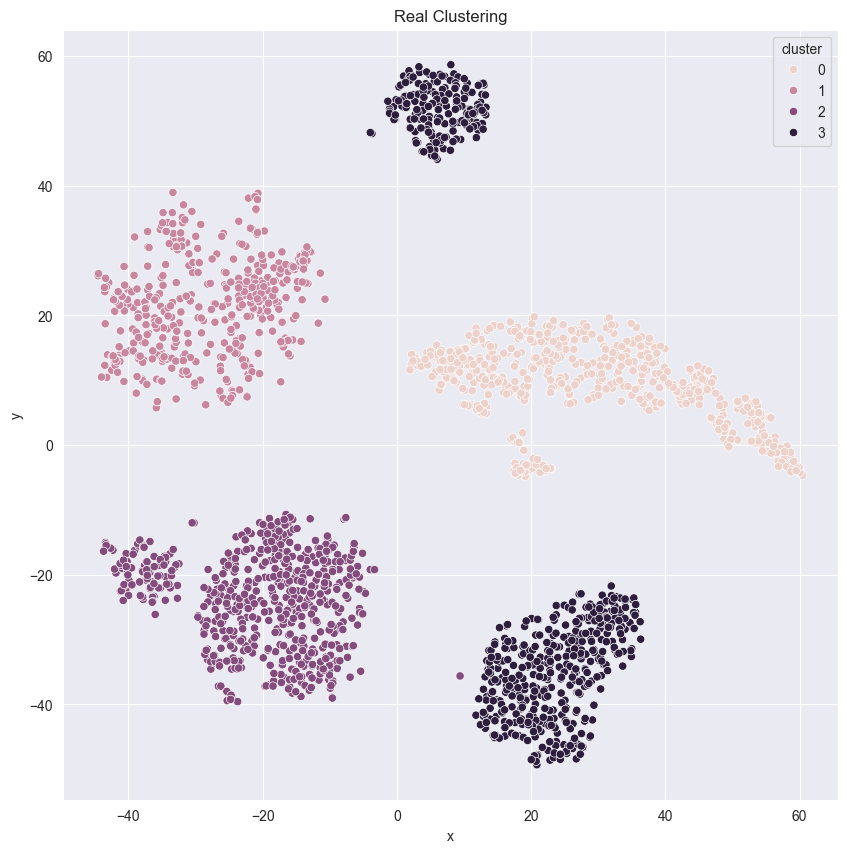

In [19]:
# plot

tsne = TSNE(n_components=2, random_state=0)

tsne_df = tsne.fit_transform(df)

tsne_df = pd.DataFrame(tsne_df, columns=['x', 'y'])

tsne_df['cluster'] = df['cluster']

# convert the cluster to the real labels
labels = {0: 'aj', 1: 'bbc', 2: 'jp', 3: 'nyt'}

tsne_df['cluster'] = tsne_df['cluster'].apply(lambda x: labels[x])

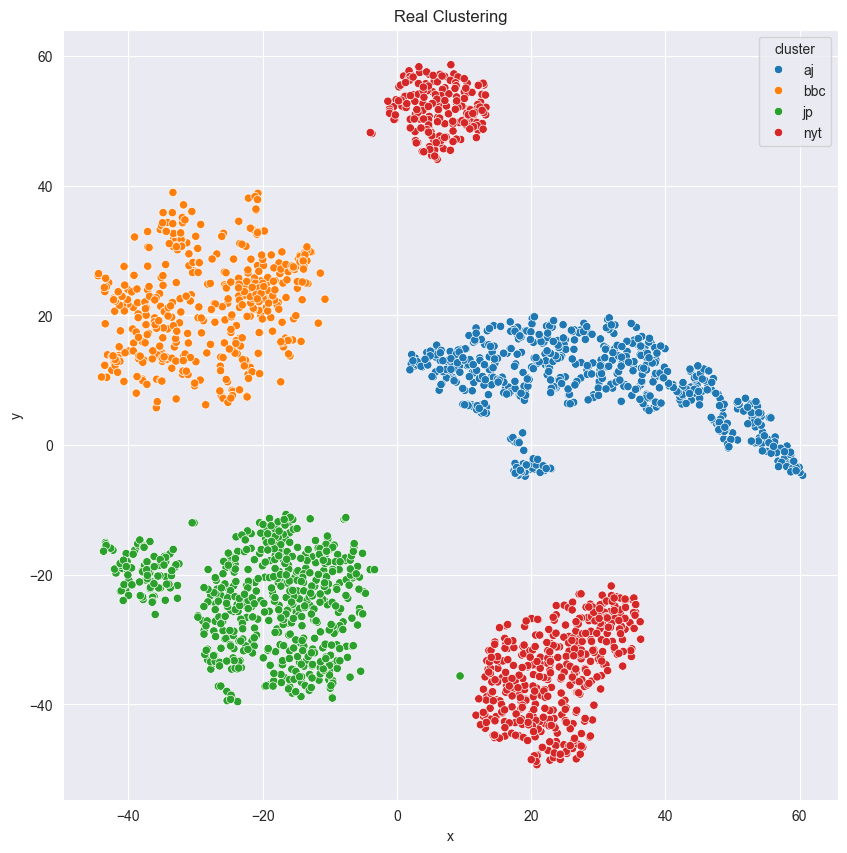

In [21]:
# convert the cluster to the real labels
labels = {0: 'aj', 1: 'bbc', 2: 'jp', 3: 'nyt'}

tsne_df['cluster'] = tsne_df['cluster'].apply(lambda x: labels[x])

plt.figure(figsize=(10, 10))

plt.title('Real Clustering')

# make the 0 label show 'aj' etc

sns.scatterplot(x='x', y='y', hue='cluster', data=tsne_df)

plt.show()